In [39]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [40]:
len(sns.get_dataset_names())

22

In [41]:
df = sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [42]:
df.shape

(244, 7)

In [43]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [44]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [45]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [48]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [49]:
df.duplicated().sum()

1

In [50]:
df = df.drop_duplicates()

In [51]:
df.groupby('day')['tip'].sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19184\2019266334.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day')['tip'].sum()


day
Thur    169.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

In [52]:
df.groupby(['day','sex'])['tip'].sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19184\2117427183.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['day','sex'])['tip'].sum()


day   sex   
Thur  Male       89.41
      Female     80.42
Fri   Male       26.93
      Female     25.03
Sat   Male      181.95
      Female     78.45
Sun   Male      186.78
      Female     60.61
Name: tip, dtype: float64

In [53]:
df['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [54]:
df['time'].value_counts()

time
Dinner    176
Lunch      67
Name: count, dtype: int64

In [57]:
# Gender Analysis
gender_analysis = df.groupby('sex')[['total_bill', 'tip']].mean()
print('\nGender Analysis:\n', gender_analysis)


Gender Analysis:
         total_bill       tip
sex                         
Male     20.744076  3.089618
Female   18.115698  2.843140


C:\Users\Admin\AppData\Local\Temp\ipykernel_19184\963404922.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_analysis = df.groupby('sex')[['total_bill', 'tip']].mean()


In [58]:
# Day-wise Analysis
day_analysis = df.groupby('day')[['total_bill', 'tip']].mean()
print('\nDay-wise Analysis:\n', day_analysis)


Day-wise Analysis:
       total_bill       tip
day                       
Thur   17.759508  2.784098
Fri    17.151579  2.734737
Sat    20.441379  2.993103
Sun    21.410000  3.255132


C:\Users\Admin\AppData\Local\Temp\ipykernel_19184\2423522613.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_analysis = df.groupby('day')[['total_bill', 'tip']].mean()


In [59]:
# Size Impact
size_analysis = df.groupby('size')[['total_bill', 'tip']].mean()
print('\nSize Impact:\n', size_analysis)


Size Impact:
       total_bill       tip
size                      
1       7.242500  1.437500
2      16.470258  2.586065
3      23.277632  3.393158
4      28.613514  4.135405
5      30.068000  4.028000
6      34.830000  5.225000


In [60]:
# Smoking vs. Non-Smoking
smoking_analysis = df.groupby('smoker')[['total_bill', 'tip']].mean()
print('\nSmoking vs. Non-Smoking Analysis:\n', smoking_analysis)


Smoking vs. Non-Smoking Analysis:
         total_bill       tip
smoker                      
Yes      20.840652  3.019674
No       19.188278  2.991854


C:\Users\Admin\AppData\Local\Temp\ipykernel_19184\1002258969.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  smoking_analysis = df.groupby('smoker')[['total_bill', 'tip']].mean()


In [61]:
# Time Analysis
smoking_analysis = df.groupby('time')[['total_bill', 'tip']].mean()
print('\nSmoking vs. Non-Smoking Analysis:\n', smoking_analysis)


Smoking vs. Non-Smoking Analysis:
         total_bill       tip
time                        
Lunch    17.230896  2.738955
Dinner   20.797159  3.102670


C:\Users\Admin\AppData\Local\Temp\ipykernel_19184\1908862586.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  smoking_analysis = df.groupby('time')[['total_bill', 'tip']].mean()


### 1.Bar Plot / Count Plot
- Displaying the distribution of categorical variables.
- Visualizing the frequency or count of each category in a dataset.

C:\Users\Admin\AppData\Local\Temp\ipykernel_19184\1054231235.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['day'], y = df['tip'] , palette='Set2')


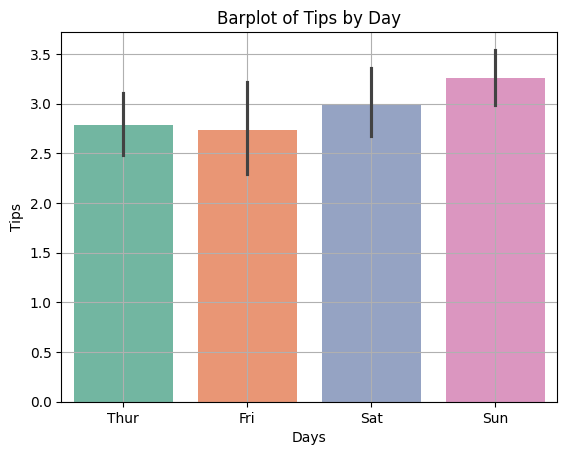

In [62]:
sns.barplot(x=df['day'], y = df['tip'] , palette='Set2')
plt.grid()
plt.xlabel('Days')
plt.ylabel('Tips')
plt.title('Barplot of Tips by Day')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19184\1129520524.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day', data=df, palette='Greens')


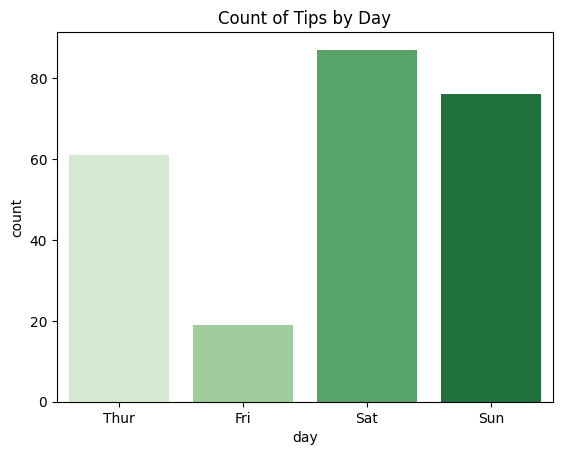

In [63]:
sns.countplot(x='day', data=df, palette='Greens')
plt.title('Count of Tips by Day')
plt.show()

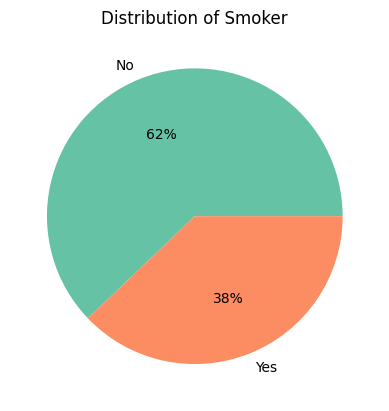

In [64]:
Smoker = df['smoker'].value_counts()

plt.pie(Smoker, labels=Smoker.index, autopct='%1.f%%', colors=sns.color_palette('Set2'))

plt.title('Distribution of Smoker')
plt.show()


**palatte**

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

### 2. Scatter Plot
- Exploring the relationship between two continuous variables.
- Identifying patterns, correlations, or clusters in the data.

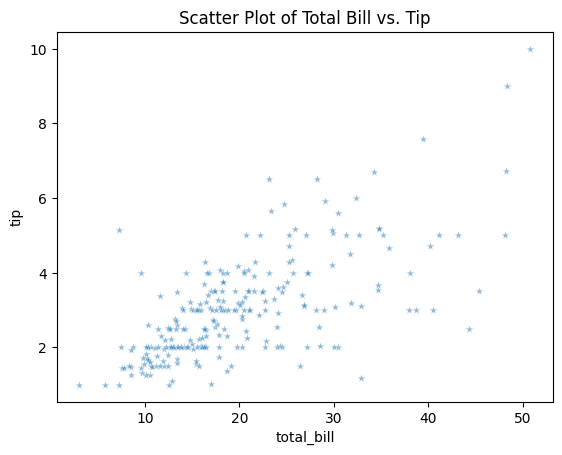

In [69]:
sns.scatterplot(x='total_bill', y='tip', data=df, alpha = 0.5, marker='*') #p,s,h,d,x,^,+,*,-
plt.title('Scatter Plot of Total Bill vs. Tip')
plt.show()

### 3. Line Plot
- Displaying the trend or pattern in a time series.
- Showing the relationship between two continuous variables over a continuous interval.
- Comparing changes in variables over a continuous range.

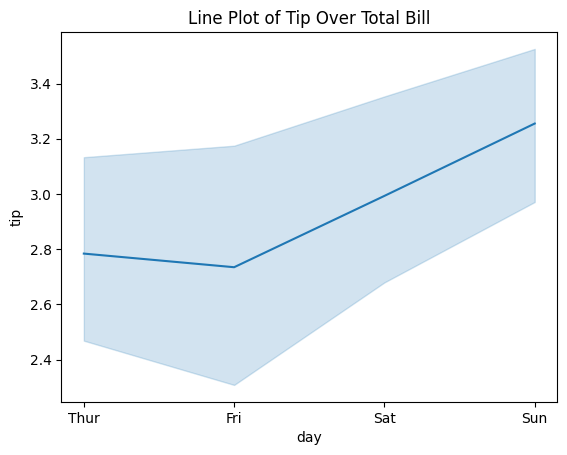

In [70]:
sns.lineplot(x='day', y='tip', data=df)
plt.title('Line Plot of Tip Over Total Bill')
plt.show()

### 4. Box Plot
- Displaying the mean, median, quantiles, and outliers in data.
- Comparing the distribution of multiple variables.
- Identifying the spread of numerical variables.
- Detecting potential outliers in the dataset.

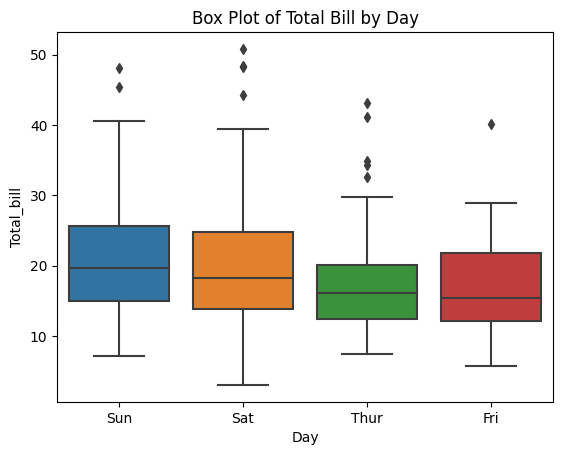

In [ ]:
sns.boxplot(x='day', y='total_bill', data=df)
plt.title('Box Plot of Total Bill by Day')
plt.show()

### 5. Density Plot 

we use density plots instead of histograms

- Visualizing the distribution of a continuous variable.
- Identifying peaks, valleys, and overall patterns in the data.
- Understanding the shape of the distribution.
- Comparing the distributions of multiple variables.

C:\Users\Admin\AppData\Local\Temp\ipykernel_6960\3026232118.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Total_bill'], shade=True)


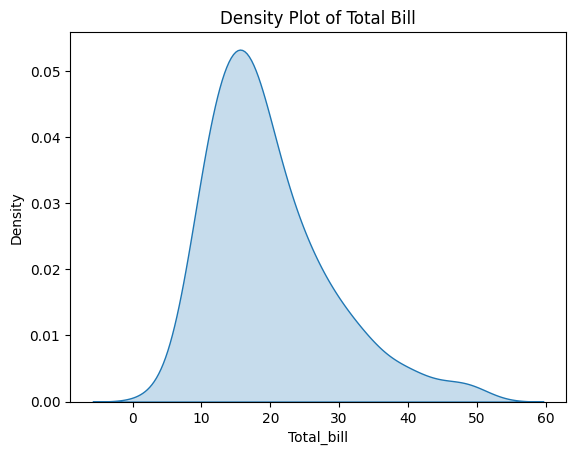

In [ ]:
sns.kdeplot(df['total_bill'], shade=True)
plt.title('Density Plot of Total Bill')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19184\1851804115.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_bill'],


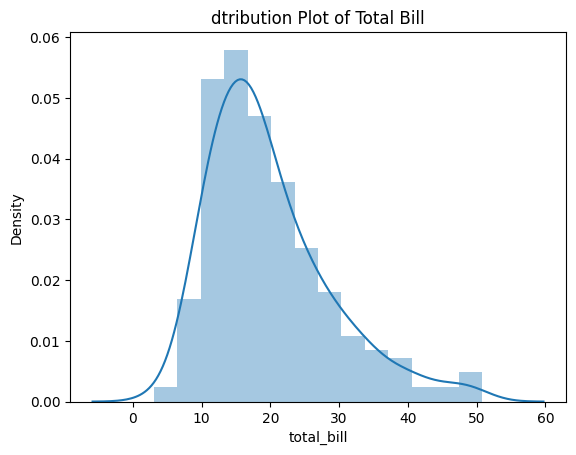

In [ ]:
sns.distplot(df['total_bill'], 
             hist=True)
plt.title('dtribution Plot of Total Bill')
plt.show()

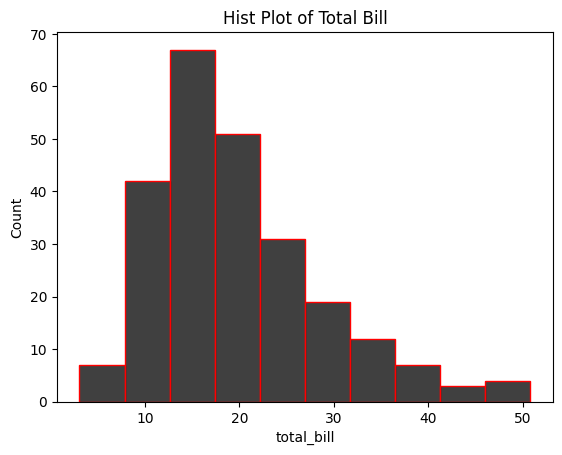

In [ ]:
sns.histplot(df['total_bill'],edgecolor= 'red', bins=10, color='black')
plt.title('Hist Plot of Total Bill')
plt.show()

### 6. Pairplot
- Exploring correlations and trends between multiple variables by visualizing them in pairs.

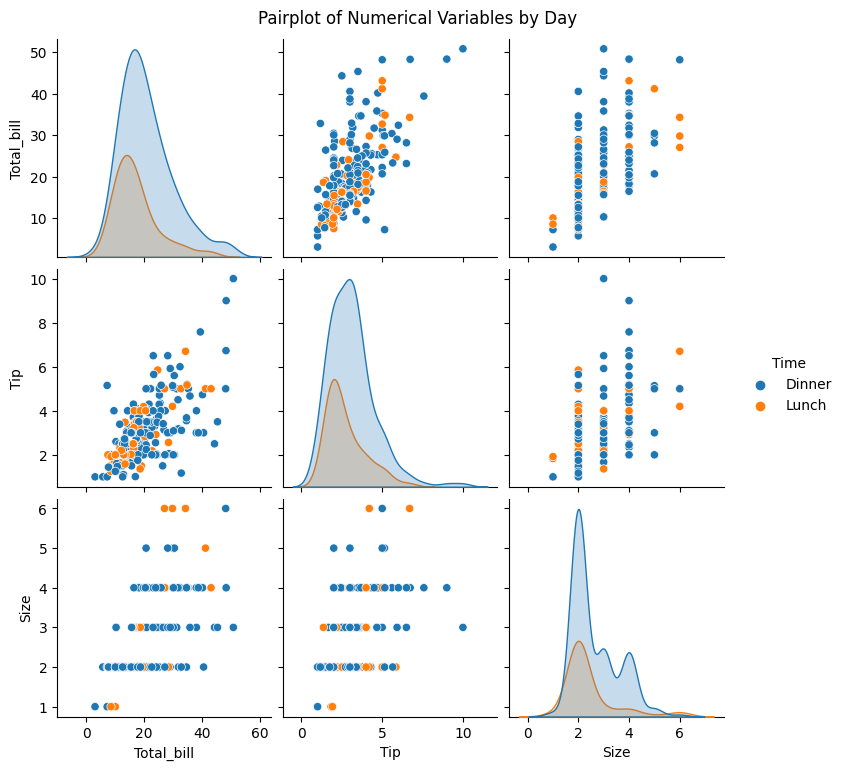

In [ ]:
#sns.pairplot(df , kind = "reg")
sns.pairplot(df, hue='time')
plt.suptitle('Pairplot of Numerical Variables by Day', y=1.02, x=0.5)
plt.show()

### 7. Heatmap
- Displaying the correlation matrix of numerical variables.
- Identifying patterns and relationships in a large dataset.


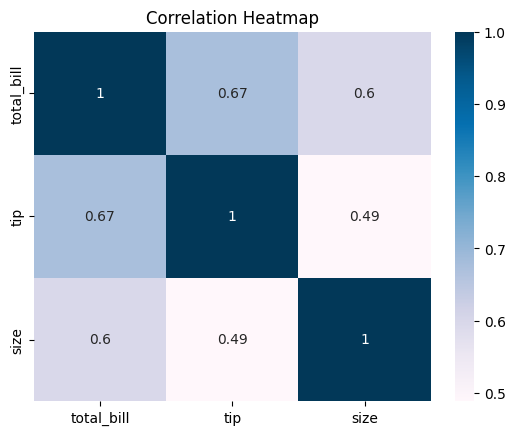

In [ ]:
correlation_matrix = df[['total_bill','tip','size']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='PuBu')
plt.title('Correlation Heatmap')
plt.show()

### 8. Combining Plots
- Well, we sort of do that a lot when it comes to EDA by employing plots that are actually just a combination of the plots discussed above.

- We do this in an attempt to ‘save time’ but let’s be real, decent EDA takes a lot of time regardless.

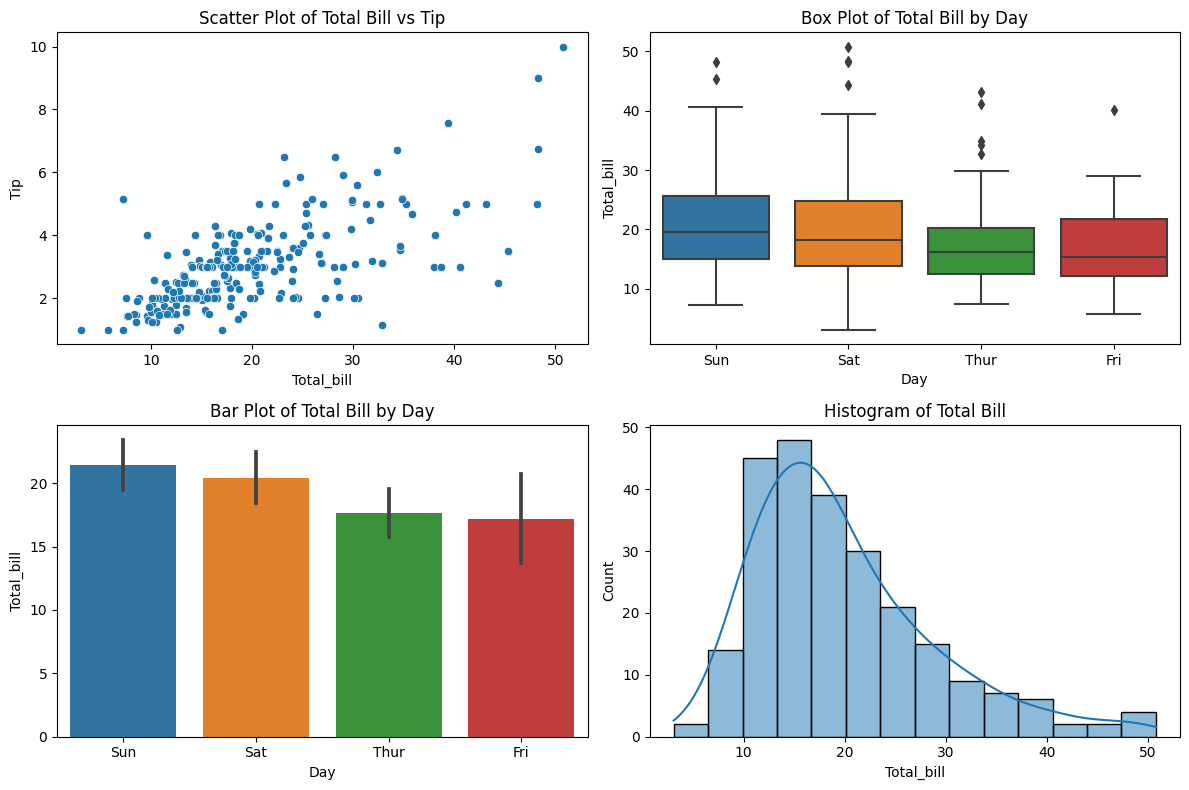

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Scatter Plot of Total Bill vs Tip')

plt.subplot(2, 2, 2)
sns.boxplot(x='day', y='total_bill', data=df)
plt.title('Box Plot of Total Bill by Day')

plt.subplot(2, 2, 3)
sns.barplot(x='day', y='total_bill', data=df)
plt.title('Bar Plot of Total Bill by Day')

plt.subplot(2, 2, 4)
sns.histplot(df['total_bill'], kde=True)
plt.title('Histogram of Total Bill')

plt.tight_layout()
plt.show()

### 9. Violin Plot
- Combines the features of box plots and kernel density plots.
- Visualizing the distribution of a numerical variable across different categories.

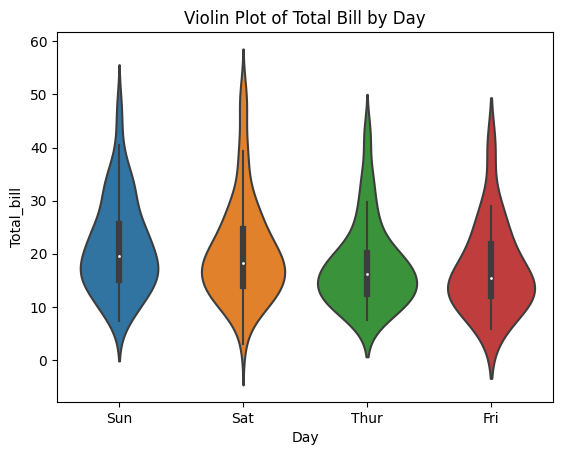

In [ ]:
sns.violinplot(x='day', y='total_bill', data=df)
plt.title('Violin Plot of Total Bill by Day')
plt.show()